# Team 8 Modeling and Simulation

# Problem Setup

Guide for symbols:
- $A_T$ heat transfer area (m$^2$)
- $A_1, A_2$ preexponential factors in Arrhenius equation
- $C_{heat,ag}$ heat capacity of cooling agent (Jg$^{-1}$K$^{-1}$)
- $C_{heat,r}$ heat capacity of mass of reaction (Jg$^{-1}$K$^{-1}$)
- $c_j$ concentration of ion $j$
- $c_{O_2}$ oxygen concentration in liquid phase (mg/L)
- $^*$ denotes equilibrium concentration
- $c_P$ product (ethanol) concentration (g/L)
- $c_S$ substrate (glucose) concentration (g/L)
- $_{in}$ denotes quantity in the feed flow
- $c_X$ biomass (yeast) concentration (g/L)
- $E_{a1}, E_{a2}$ apparent activation energy for growth, denaturation reactions, respectively
- $F_{ag}$ flow of cooling agent (L/h)
- $F_e$ outlet flow from the reactor (L/h)
- $F_i$ flow of substrate entering the reactor (L/h)
- $H_i$ specific ionic constant of ion $i$
- $I_i$ ionic strength of ion $i$
- $k_la$ product of mass-transfer coefficient for oxygen and gas-phase specific area (1/h) (subscript 0 denotes at 20degC)
- $K_{O_2}$ constant of oxygen consumption (g/L)
- $K_P$ constant of growth inhibition by ethanol (g/L)
- $K_{P1}$ constant  of fermentation inhibition by ethanol (g/L)
- $K_S$ constant in the substrate term for growth (g/L)
- $K_{S1}$ constant in the substrate term for ethanol production (g/L)
- $K_T$ heat transfer coefficient (Jh$^{-1}$m$^{-2}$K$^{-1}$)
- $m_i$ quantity of inorganic salt $i$ (g)
- $M_i$ molecular/atomic mass of salt/ion $i$ (g/mol)
- $r_{O_2}$ rate of oxygen consumption (mg/L/hr)
- $R$ universal gas constant (8.31 J/mol/K)
- $R_{SP}$ ratio of ethanol produced per glucose consumed for fermentation
- $R_{SX}$ ratio of cell produced per glucose consumed for growth
- $t$ time (hr)
- $T_{ag}$ temperature of cooling agent in jacket (degC)
- $T_{in}$ temperature of substrate flow entering reactor (degC)
- $T_{in,ag}$ temperature of cooling agent entering jacket (degC)
- $T_r$ temperature in the reactor (degC)
- $V$ volume of the mass of reaction (L)
- $V_j$ volume of the jacket (L)
- $Y_{O_2}$ yield factor for biomass on oxygen, amount of oxygen consumed per unit biomass produced (mg/mg)
- $z_i$ ionic charge of ion $i$
- $\Delta H_r$ reaction heat of fermentation (kJ/mol oxygen consumed)
- $\mu_{O_2}$ maximum specific oxygen consumption rate (1/hr)
- $\mu_P$ maximum specific fermentation rate (1/hr)
- $\mu_X$ maximum specific growth rate (1/hr)
- $\rho_{ag}$ density of cooling agent (g/L)
- $\rho_r$ density of the mass of reaction (g/L)

The set of differential equations that we are modeling are:

\begin{align}
\frac{dV}{dt} &= F_i - F_e \\
\frac{dc_x}{dt} &= \mu_Xc_X\frac{c_S}{K_S+c_S}e^{-K_pc_p} - \frac{F_e}{V}c_X \\
\frac{dc_P}{dt} &= \mu_Pc_X\frac{c_S}{K_{S1}+c_S}e^{-K_{P1}c_P} - \frac{F_e}{V}c_P \\
\frac{dc_S}{dt} &= -\frac{1}{R_{SX}}\mu_Xc_X\frac{c_S}{K_S+c_S}e^{-K_Pc_P} - \frac{1}{R_{SP}}\mu_Pc_X\frac{c_S}{K_{S1}+c_s}e^{-K_{P1}c_P}+\frac{F_i}{V}c_{S,in} - \frac{F_e}{V}c_S \\
\frac{dc_{O_2}}{dt} &= (k_la)(c_{O_2}^* - c_{O_2}) - r_{O_2} \\
\frac{dT_r}{dt} &= \frac{F_i}{V}(T_{in}+273) - \frac{F_e}{V}(T_r+273) + \frac{r_{O_2}\Delta H_r}{32\rho_r C_{heat, r}} + \frac{K_TA_T(T_r-T_{ag})}{V\rho_rC_{heat,r}} \\
\frac{dT_{ag}}{dt} &= \frac{F_{ag}}{V_j}(T_{in,ag}-T_{ag}) + \frac{K_TA_T(T_r-T_{ag})}{V_j\rho_{ag}C_{heat,ag}}
\end{align}

In [12]:
m_NaCl = 500 #g
m_CaCO3 = 100 #g
m_MgCl2 = 100 #g
pH = 6 #of liquid phase
F_i = 51 #L/h
F_e = 51 #L/h
c_Sin = 60 #g/L
T_in = 273 + 25 # K
T_inag = 273 + 15 # K


We also define the molar concentrations as:

\begin{align}
c_{Na} &= \frac{m_{NaCl}}{M_{NaCl}}\frac{M_{Na}}{V} \\
c_{Ca} &= \frac{m_{CaCO_3}}{M_{CaCO_3}}\frac{M_{Ca}}{V} \\
c_{Mg} &= \frac{m_{MgCl_2}}{M_{MgCl_2}}\frac{M_{Mg}}{V} \\
c_{Cl} &= (\frac{m_{NaCl}}{M_{NaCl}} + 2\frac{m_{MgCl_2}}{M_{MgCl_2}})\frac{M_{Cl}}{V} \\
c_{CO_3} &= \frac{m_{CaCO_3}}{M_{CaCO_3}}\frac{M_{CO_3}}{V} \\
c_H &= 10^{-pH} \\
c_{OH} &= 10^{-(14-pH)}
\end{align}

And the ionic strengths as:

\begin{align}
I_i = \frac{1}{2}c_iz_i^2
\end{align}

Where the charges, $z_i$, are: 1 for Na, 2 for Ca, 2 for Mg, -1 for Cl, -2 for CO3, 1 for H, and -1 for OH.

The global effect of ionic strengths is $\sum H_i I_i$, where $H_i$ is the specific ionic constant.

We determine the equilibrium concentration of oxygen in water by empirical correlation,
$$c_{O_2,0}^* = 14.6 - 0.3943T_r + 0.007714T_r^2 - 0.0000646 T_r^3$$
And then factor in the effect of ions via:
$$c_{O_2}^* = c_{O_2,0}^*\times 10^{-\sum H_iI_i}$$

The mass transfer coefficient for oxygen is found from:
$$k_la = (k_la)_0(1.024)^{T_r-20}$$
And the rate of oxygen consumption is:
$$r_{O_2} = \mu_{O_2}\frac{1}{Y_{O_2}}c_X\frac{c_{O_2}}{K_{O_2}+c_{O_2}}$$

And we also have the maximum specific growth rate,
$$\mu_X = A_1e^{-(E_{a1}/R(T_r+273))} - A_2e^{-E_{a2}/R(T_r+273))}$$

### Givens

In [13]:

A_1 = 9.5e8
A_2 = 2.55e33
A_T = 1 #m2
C_heatag = 4.18 #J/g/K
C_heatr = 4.18 #J/g/K
E_a1 = 55000 #J/mol
E_a2 = 220000 #J/mol
H_Na = -0.550
H_Ca = -0.303
H_Mg = -0.314
H_H = -0.774
H_Cl = 0.844
H_CO3 = 0.485
H_HO = 0.941
kla_0 = 38 #1/hr
K_O2 = 8.86 #mg/L
K_P =  0.139 #g/L
K_P1 = 0.070 #g/L
K_S = 1.030 #g/L
K_S1 = 1.680 #g/L
K_T = 3.6e5 #J/h/m2/K
R_SP = 0.435
R_SX = 0.607
V = 1000 #L
V_j = 50 #L
Y_O2 = 0.970 #mg/mg
deltaH_r = 518 #kJ/molO2
mu_O2 = 0.5 #1/hr
mu_P = 1.790 #1/hr
rho_ag = 1000 #g/L
rho_r = 1080 #g/L

Rg = 8.314 # J/mol K

Inputs: $F_i, F_e, c_{S,in}, T_{in}, T_{in,ag}$ \\
Outputs: $c_S, c_X, c_{O_2}, c_P, T_r, T_{ag}$


**ASK**
Is $F_{ag}$ also an input?




The simulation part of this study aims to see how the inputs affect the outputs, mostly with respect to how $c_{S,in}$ and $T_{in}$ affect the six outputs listed above. From the paper, it is expected that changes in $c_{S,in}$ should have negligible impacts on the outputs, while changes in $T_{in}$ will have large effects. While the paper does not study the effects of the other inputs on the outputs, those can be easily simulated as well.

We then aim to create a linear model of this bioreactor and compare it with the true nonlinear behavior.

Finally, we aim to develop an Artificial Neural Network (ANN) that can take some of the previous outputs and inputs and predict the next value of the output. This ANN will then be incorporated in an MPC scheme to predict how the system will behave at future times.

---

# PYTHON FRAMEWORK

In [14]:
# ALL PARAMS

m_NaCl = 500 #g
m_CaCO3 = 100 #g
m_MgCl2 = 100 #g
pH = 6 #of liquid phase
F_i = 51 #L/h
F_e = 51 #L/h
c_Sin = 60 #g/L
T_in = 273 + 25 # K
T_inag = 273 + 15 # K

A_1 = 9.5e8
A_2 = 2.55e33
A_T = 1 #m2
C_heatag = 4.18 #J/g/K
C_heatr = 4.18 #J/g/K
E_a1 = 55000 #J/mol
E_a2 = 220000 #J/mol
H_Na = -0.550
H_Ca = -0.303
H_Mg = -0.314
H_H = -0.774
H_Cl = 0.844
H_CO3 = 0.485
H_HO = 0.941
kla_0 = 38 #1/hr
K_O2 = 8.86 #mg/L
K_P =  0.139 #g/L
K_P1 = 0.070 #g/L
K_S = 1.030 #g/L
K_S1 = 1.680 #g/L
K_T = 3.6e5 #J/h/m2/K
R_SP = 0.435
R_SX = 0.607
V = 1000 #L
V_j = 50 #L
Y_O2 = 0.970 #mg/mg
deltaH_r = 518 #kJ/molO2
mu_O2 = 0.5 #1/hr
mu_P = 1.790 #1/hr
rho_ag = 1000 #g/L
rho_r = 1080 #g/L

# gas constant
Rg = 8.314 # J/mol K

# molar masses (g/mol)
M_Na = 22.99 
M_NaCl = 58.44
M_Ca = 40.08
M_CaCO3 = 100.09
M_Mg = 24.31
M_MgCl2 = 95.21
M_Cl = 35.45
M_CO3 = 60.01

In [15]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import random

# molar concentration calculations (ions)
c_Na = m_NaCl*M_Na / (M_NaCl*V)
c_Ca = m_CaCO3*M_Ca / (M_CaCO3*V)
c_Mg = m_MgCl2*M_Mg / (M_MgCl2*V)
c_Cl = (m_NaCl/M_NaCl + 2*m_MgCl2/M_MgCl2) * M_Cl/V
c_CO3 = m_CaCO3*M_CO3 / (M_CaCO3*V)
# concentration from pH
c_H = 10**(-pH)
c_OH = 10**(pH-14)

# Ionic strength calculations (Eq 18)
I_Na = 0.5*c_Na
I_Ca = 0.5*c_Ca*(2**2)
I_Mg = 0.5*c_Mg*(2**2)
I_Cl = 0.5*c_Cl
I_CO3 = 0.5*c_CO3*(2**2)
I_H = 0.5*c_H
I_OH = 0.5*c_OH

print (c_Na, c_Ca, c_Mg, c_Cl, c_CO3, c_H, c_OH)
print (I_Na, I_Ca, I_Mg, I_Cl, I_CO3, I_H, I_OH)

# global effect of ionic strengths (Eq 26)
ionic_strengths = np.array ([I_Na, I_Ca, I_Mg, I_Cl, I_CO3, I_H, I_OH])
Hs = np.array ([H_Na, H_Ca, H_Mg, H_Cl, H_CO3, H_H, H_HO])

global_eff = np.dot (ionic_strengths, Hs)

global_eff

0.19669746748802192 0.040043960435607956 0.02553303224451213 0.3777695002674661 0.05995603956439205 1e-06 1e-08
0.09834873374401096 0.08008792087121591 0.05106606448902426 0.18888475013373304 0.1199120791287841 5e-07 5e-09


0.1231825173625929

In [16]:
def get_kla (T_r):
  """
  T_r : Reaction Temperature in Kelvin
  """
  T_r = T_r - 273 # conversion to celsius

  # (Eq 27) equilibrium conc of O2 in H2O
  Cstar_0 = 14.6 - 0.3943*T_r + 7.714e-3*(T_r**2) - 6.46e-5*(T_r**3)

  # (Eq 28)
  Cstar = Cstar_0 * 10**(-global_eff) 

  # (Eq 29)
  kla = kla_0 * 1.024**(T_r-20)
  return kla, Cstar

# (Eq 31)
mu_x = lambda T_r: A_1*np.exp(-E_a1/(Rg*T_r)) - A_2*np.exp(-E_a2/(Rg*T_r)) # max specific growth rate as a function of reaction T


In [17]:
# Original ODEs function
def odes (t, variables):
  Cx, Cp, Cs, Co2, T_r, T_ag = variables

  # dVdt = 0
  dCxdt = mu_x(T_r) * Cx * Cs * np.exp(-K_P*Cp) / (K_S+Cs) - F_e*Cx/V
  dCpdt = mu_P * Cx * Cs * np.exp(-K_P1*Cp) / (K_S1+Cs) - F_e*Cp/V
  dCsdt = (-mu_x(T_r) * Cx * Cs * np.exp(-K_P*Cp) / (K_S+Cs) / R_SX) - (mu_P * Cx * Cs * np.exp(-K_P1*Cp) / (K_S1+Cs) / R_SP) + (F_i*c_Sin - F_e*Cs)/V
  
  # (Eq 30)
  r_o2 = mu_O2 * Cx * Co2 / (Y_O2 * (K_O2+Co2))
  kla, Cstar = get_kla (T_r)
  # (Eq 36)
  dCo2dt = kla * (Cstar-Co2) - r_o2
  

  F_ag = 40 # compute later or keep it as constant value?

  # (Eq 37,38)
  dTrdt = (F_i*T_in - F_e*T_r)/V + r_o2*deltaH_r/(32*rho_r*C_heatr) + (K_T*A_T*(T_r-T_ag))/(V*rho_r*C_heatr)
  dTagdt = F_ag*(T_inag-T_ag)/V_j + (K_T*A_T*(T_r-T_ag))/(V_j*rho_ag*C_heatag)

  return [dCxdt, dCpdt, dCsdt, dCo2dt, dTrdt, dTagdt]


# odes (1, [100, 0, 60, 0, 298, 288]) # test

In [18]:
# Attempting a different version of ODEs that uses the randomly generated F_ag
def odes (t, variables, F_ag):
  Cx, Cp, Cs, Co2, T_r, T_ag = variables

  # dVdt = 0
  dCxdt = mu_x(T_r) * Cx * Cs * np.exp(-K_P*Cp) / (K_S+Cs) - F_e*Cx/V
  dCpdt = mu_P * Cx * Cs * np.exp(-K_P1*Cp) / (K_S1+Cs) - F_e*Cp/V
  dCsdt = (-mu_x(T_r) * Cx * Cs * np.exp(-K_P*Cp) / (K_S+Cs) / R_SX) - (mu_P * Cx * Cs * np.exp(-K_P1*Cp) / (K_S1+Cs) / R_SP) + (F_i*c_Sin - F_e*Cs)/V
  
  # (Eq 30)
  r_o2 = mu_O2 * Cx * Co2 / (Y_O2 * (K_O2+Co2))
  kla, Cstar = get_kla (T_r)
  # (Eq 36)
  dCo2dt = kla * (Cstar-Co2) - r_o2
  

  # (Eq 37,38)
  dTrdt = (F_i*T_in - F_e*T_r)/V + r_o2*deltaH_r/(32*rho_r*C_heatr) + (K_T*A_T*(T_r-T_ag))/(V*rho_r*C_heatr)
  dTagdt = F_ag[int(t)]*(T_inag-T_ag)/V_j + (K_T*A_T*(T_r-T_ag))/(V_j*rho_ag*C_heatag)

  return [dCxdt, dCpdt, dCsdt, dCo2dt, dTrdt, dTagdt]

### Setup to Solve ODEs

In [19]:
N=10

np.random.randint (5,60, size=(N,1))

array([[14],
       [ 7],
       [12],
       [58],
       [10],
       [41],
       [42],
       [26],
       [45],
       [18]])

In [20]:
def generate_inputs (N):
  Cx_in = np.random.randint (5, 60, size=(N,1)) # random in [5,60] g/mL
  Cp_in = np.zeros ((N,1))
  Cs_in = np.random.randint (5, 60, size=(N,1))
  Co2_in = np.zeros ((N,1))
  T_in = np.random.randint (298, 350, size=(N,1)) # random in [298,350] K
  T_inag = np.random.randint (298, 350, size=(N,1))
  random_inputs = np.hstack ([Cx_in, Cp_in, Cs_in, Co2_in, T_in, T_inag])
  return random_inputs # N x 6

# vars0 = random_inputs[i]

def solve_sys (vars0, F_ag):
  tspan = (0, 500) # hrs
  teval = np.linspace (*tspan, 500)
  sol = solve_ivp (odes, tspan, vars0, t_eval=teval, args = F_ag)
  return sol.t, sol.y

def generate_ode_data(random_inputs, F_ag):
  solutions = []
  for i, vars0 in enumerate(random_inputs):
    t, y = solve_sys(vars0, [F_ag[i]])
    
    solutions.append (y)
    print (f"{i+1}/{random_inputs.shape[0]}")
  return np.array(solutions)

# Choose are we predicting
# Define what kind of dataset we want
# sol.y with shape (6,N) itself is sequential? (N: number of timesteps, len(teval))


In [21]:
def GenerateRandomF_agInput(length):
    import random
    import matplotlib.pyplot as plt

    # Generate sequence
    F_ag_random_sequence = []
    i = 0
    while i < length:
        if i % random.randint(5, 50) == 0:
            F_ag_random_sequence.append(random.randint(80, 200))
            i += 1
            if i < length:
              temp_stable_input = random.randint(0, 20)
              temp_stable_input_length = random.randint(3,40)
              for j in range(temp_stable_input_length):
                if i < length:
                  F_ag_random_sequence.append(temp_stable_input)
                  i += 1
        else:
            F_ag_random_sequence.append(random.randint(0, 20))
            i += 1
    # print("F_ag_random shape", len(F_ag_random_sequence))
    # # Plot sequence
    # plt.plot(F_ag_random_sequence)
    # plt.xlabel('Time')
    # plt.ylabel('F_ag')
    # plt.title('Randomly Generated Input Sequence')
    # plt.show()
    return F_ag_random_sequence

### Generate Random Inputs and F_ag control moves, then solve ODEs

In [22]:
# generate random inputs in reasonable range
# solve odes with the random inputs and store results
np.random.seed (1)
N=50
random_inputs = generate_inputs (N)
length = 501
F_ag_array = np.zeros((N, length))
for i in range(N):
  F_ag_array[i,:] = GenerateRandomF_agInput(length)
  
dataset = generate_ode_data (random_inputs, F_ag_array)
dataset.shape # (N,6,timesteps) = (50,6,500)

1/50
2/50
3/50
4/50
5/50
6/50
7/50
8/50
9/50
10/50
11/50
12/50
13/50
14/50
15/50
16/50
17/50
18/50
19/50
20/50
21/50
22/50
23/50
24/50
25/50
26/50
27/50
28/50
29/50
30/50
31/50
32/50
33/50
34/50
35/50
36/50
37/50
38/50
39/50
40/50
41/50
42/50
43/50
44/50
45/50
46/50
47/50
48/50
49/50
50/50


(50, 6, 500)

In [23]:
np.save ("ode_dataset.npy", dataset) # N=50 saved

Text(0.5, 1.0, 'T_ag')

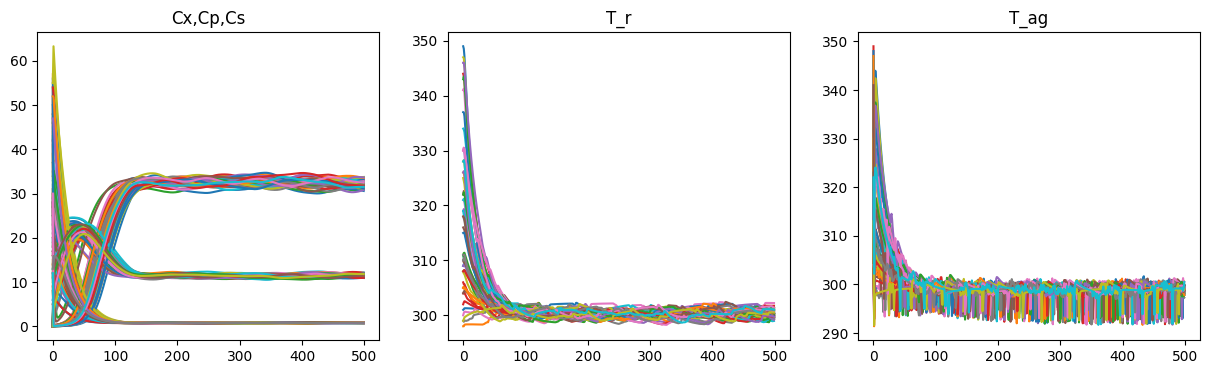

In [24]:
fig,ax = plt.subplots (1,3, figsize=(15,4))
for i in range (dataset.shape[0]):
  concentrations = dataset[i][0:3].T # without Co2
  ax[0].plot (concentrations)

  Trs = dataset[i][4].T
  ax[1].plot (Trs)

  Tags = dataset[i][5].T
  ax[2].plot (Tags)

ax[0].set_title ("Cx,Cp,Cs")
ax[1].set_title ("T_r")
ax[2].set_title ("T_ag")
# Cx, Cp, Cs, Co2, T_r, T_ag

### Plot one instance of F_ag and Reactor Temperature

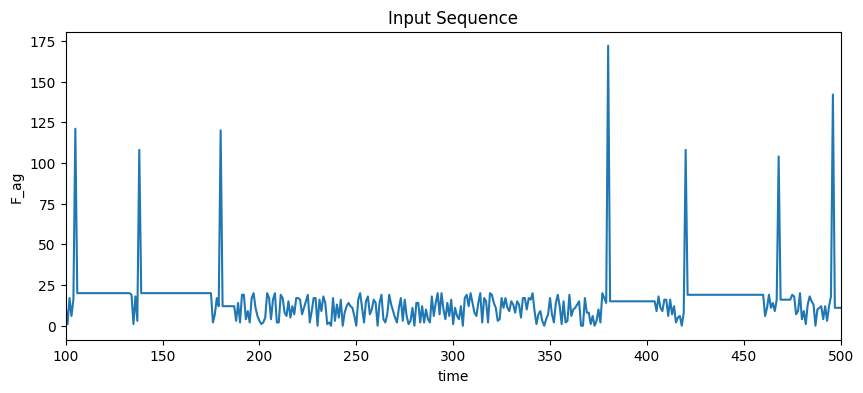

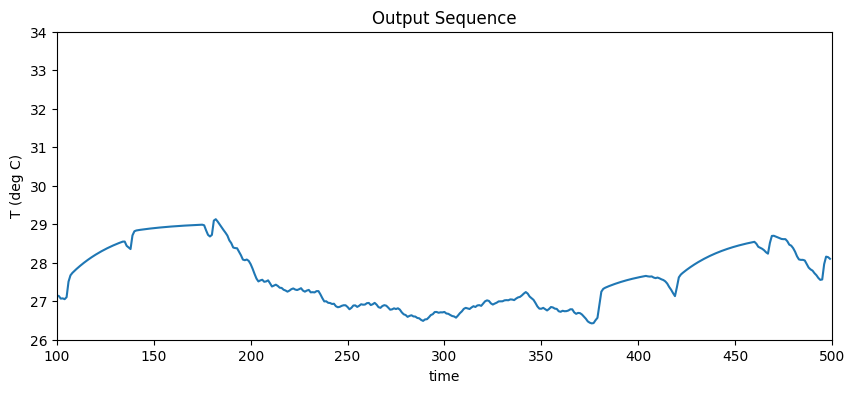

In [25]:
# fig,ax = plt.subplots (1,3, figsize=(15,4))
plt.figure(figsize = (10,4))
plt.title("Input Sequence")
plt.xlabel("time")
plt.ylabel("F_ag")
plt.xlim(100,500)
plt.plot(F_ag_array[0,:])
plt.show()

plt.figure(figsize=(10,4))
plt.title("Output Sequence")
plt.xlabel("time")
plt.xlim(100,500)
plt.ylim(26,34)
plt.ylabel("T (deg C)")
plt.plot(dataset[0][4].T - 273.15)
plt.show()


# Neural Network

In [26]:
# dataset = np.load("ode_dataset.npy")
def data_preprocessing(dataset):
  data_list = []
  for i, data in enumerate(dataset):
    features = data[:, i:i+4].T # 0,1,2,3th states (4,6)
    label = data[:, i+4] # 4th states (6,)
    data_list.append ((features,label))
  return data_list

In [27]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(data_preprocessing(dataset), batch_size=1, shuffle=False)
# test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [28]:
# for ind,(i,j) in enumerate(train_dataloader):
#   print (i,j,sep="\n\n")
#   print()
#   print (i.shape, j.shape)
#   break

### Build Neural Network

In [29]:
import torch.nn as nn
import torch
fc1 = nn.Linear (24, 64) # 6states * 4timesteps = total 24 (flattened) features
fc2 = nn.Linear (64, 64)
fc3 = nn.Linear (64, 6) # predicted 6 states at next time step

model = nn.Sequential (fc1,
                       nn.ReLU(),
                       fc2,
                       nn.ReLU(),
                       fc3)

def forward (x):
  return model (x)

loss_func = nn.MSELoss()
optimizer = torch.optim.Adam (model.parameters(), lr=0.01)
num_epochs = 5
losses = []

for epoch in range (num_epochs):
  for i, (past, current) in enumerate (train_dataloader):
    input = past.float().flatten() # (24,)
    current = current.float().flatten()

    out = forward (input)

    loss = loss_func (current, out)
    losses.append (loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    print (f"iter {i} | loss = {loss}")
  

iter 0 | loss = 35746.875
iter 1 | loss = 19536.521484375
iter 2 | loss = 8508.185546875
iter 3 | loss = 1433.2940673828125
iter 4 | loss = 3710.843017578125
iter 5 | loss = 6537.58740234375
iter 6 | loss = 3493.299560546875
iter 7 | loss = 801.7449340820312
iter 8 | loss = 525.9046020507812
iter 9 | loss = 1395.52197265625
iter 10 | loss = 2249.06005859375
iter 11 | loss = 2317.257568359375
iter 12 | loss = 1778.8189697265625
iter 13 | loss = 634.7470092773438
iter 14 | loss = 313.3089294433594
iter 15 | loss = 371.1681823730469
iter 16 | loss = 765.8607788085938
iter 17 | loss = 922.9314575195312
iter 18 | loss = 779.7402954101562
iter 19 | loss = 219.1207275390625
iter 20 | loss = 86.54969024658203
iter 21 | loss = 249.79261779785156
iter 22 | loss = 474.8421630859375
iter 23 | loss = 477.9740295410156
iter 24 | loss = 282.23858642578125
iter 25 | loss = 179.3620147705078
iter 26 | loss = 143.88829040527344
iter 27 | loss = 205.47625732421875
iter 28 | loss = 205.53436279296875
iter

### Train NN

In [30]:
print (current) # label

print (model (past.float().flatten())) # prediction

tensor([  3.3258,  20.8285,   4.8678,   5.8996, 304.0053, 301.0144])
tensor([ 10.2709,  26.7658,   6.6923,   6.5281, 304.3192, 299.8115],
       grad_fn=<AddBackward0>)


In [31]:
model (past.float().flatten()) # prediction

tensor([ 10.2709,  26.7658,   6.6923,   6.5281, 304.3192, 299.8115],
       grad_fn=<AddBackward0>)

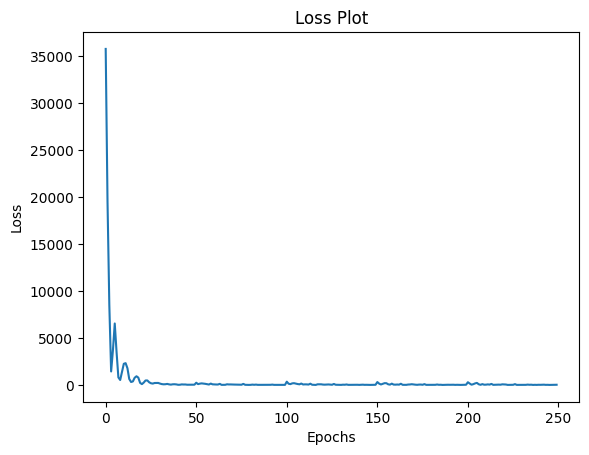

In [32]:
plt.plot (losses)
plt.title("Loss Plot")
plt.xlabel("Epochs")
plt.ylabel("Loss");

### Test NN

In [33]:
# generate random inputs in reasonable range
# solve odes with the random inputs and store results
np.random.seed(2)
N=50
length = 501
random_inputs = generate_inputs(N)

F_ag_array = np.zeros((N, length))
for i in range(N):
  F_ag_array[i,:] = GenerateRandomF_agInput(length)
  
test_dataset = generate_ode_data (random_inputs, F_ag_array)


1/50
2/50
3/50
4/50
5/50
6/50
7/50
8/50
9/50
10/50
11/50
12/50
13/50
14/50
15/50
16/50
17/50
18/50
19/50
20/50
21/50
22/50
23/50
24/50
25/50
26/50
27/50
28/50
29/50
30/50
31/50
32/50
33/50
34/50
35/50
36/50
37/50
38/50
39/50
40/50
41/50
42/50
43/50
44/50
45/50
46/50
47/50
48/50
49/50
50/50


In [34]:
test_dataloader = DataLoader(data_preprocessing(test_dataset), batch_size=1, shuffle=False)

Total test loss: 40.96492913246155


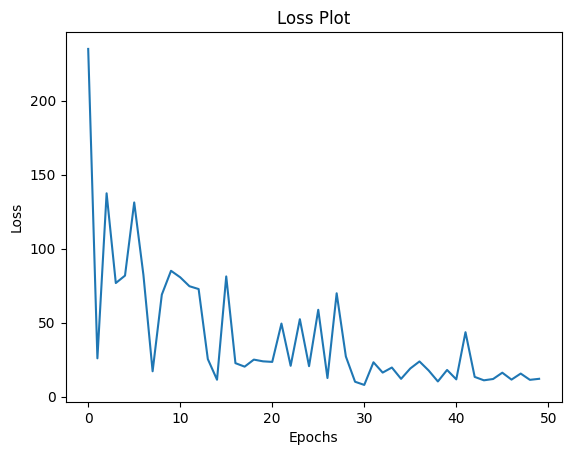

In [35]:
test_losses = []
test_loss = 0
with torch.no_grad():
  for i, (past, current) in enumerate (test_dataloader):
      input = past.float().flatten() # (24,)
      current = current.float().flatten()

      out = forward (input)

      loss = loss_func (current, out)
      test_losses.append (loss.item())

      optimizer.zero_grad()
      # loss.backward()
      optimizer.step()
      test_loss += loss.item()
test_loss = test_loss / len(test_dataloader)
print("Total test loss:", test_loss)
plt.plot (test_losses)
plt.title("Loss Plot")
plt.xlabel("Epochs")
plt.ylabel("Loss");

